In [1]:
import pandas as pd
df = pd.read_csv('Sina_Finance_Comments_2879316_20180821_ALL.csv',encoding='utf-8')
print(df.shape)
df.drop_duplicates(subset=['nick', 'content'], keep='last',inplace=True)
print(df.shape)
df.head()

(3840, 17)
(3817, 17)


,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,agree,channel,hot,level,login_type,media_type,mid
20,20,21,2,_S_酒红,2018-08-20 22:34:49,人在家中坐，锅从天上来,浙江,112.17.239.4,11,1534775689,0,cj,0,0,0,0,5B7AD187-7011EF04-14A2E4DC8-8C5-955
21,21,22,2,选择一条路然后一直走下去,2018-08-16 08:43:34,80900010就没有不垮掉的一代[跪了],青海西宁,111.44.141.9,31,1534380214,0,cj,0,2,0,0,5B74C8B3-6F2C8D09-12EEE6933-8C5-8CB
22,22,23,2,肥宅之王orz,2018-08-15 21:12:29,赞同哥们你说的，本来事实就是这样，非要在一线干活才叫吃得了苦？熬夜写代码的画图的做方案的读书...,陕西西安,113.200.204.73,74,1534338749,0,cj,0,11,0,0,5B7426BC-71C8CC49-14D2E179D-8C5-8E3
23,23,24,2,说个晚安吗,2018-08-15 17:42:03,[good][good][good],新疆,43.242.152.108,36,1534326123,0,cj,0,1,0,0,5B73F569-2BF2986C-15B085F4C-8C5-868
24,24,25,2,绾起梨花月99,2018-08-14 21:29:01,我喝不起星巴克也买不起房[跪了][摊手][摊手][摊手][摊手],广西贵港,117.181.90.157,32,1534253341,0,cj,0,0,0,0,5B72D918-75B55A9D-DBC80468-8C5-823


In [2]:
from datetime import datetime
def time2stamp(cmnttime):
    cmnttime = datetime.strptime(cmnttime, '%Y-%m-%d %H:%M:%S') 
    stamp = int(datetime.timestamp(cmnttime))
    return stamp
df['stamp'] = df['time'].apply(time2stamp)
df.head()

,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,agree,channel,hot,level,login_type,media_type,mid,stamp
20,20,21,2,_S_酒红,2018-08-20 22:34:49,人在家中坐，锅从天上来,浙江,112.17.239.4,11,1534775689,0,cj,0,0,0,0,5B7AD187-7011EF04-14A2E4DC8-8C5-955,1534775689
21,21,22,2,选择一条路然后一直走下去,2018-08-16 08:43:34,80900010就没有不垮掉的一代[跪了],青海西宁,111.44.141.9,31,1534380214,0,cj,0,2,0,0,5B74C8B3-6F2C8D09-12EEE6933-8C5-8CB,1534380214
22,22,23,2,肥宅之王orz,2018-08-15 21:12:29,赞同哥们你说的，本来事实就是这样，非要在一线干活才叫吃得了苦？熬夜写代码的画图的做方案的读书...,陕西西安,113.200.204.73,74,1534338749,0,cj,0,11,0,0,5B7426BC-71C8CC49-14D2E179D-8C5-8E3,1534338749
23,23,24,2,说个晚安吗,2018-08-15 17:42:03,[good][good][good],新疆,43.242.152.108,36,1534326123,0,cj,0,1,0,0,5B73F569-2BF2986C-15B085F4C-8C5-868,1534326123
24,24,25,2,绾起梨花月99,2018-08-14 21:29:01,我喝不起星巴克也买不起房[跪了][摊手][摊手][摊手][摊手],广西贵港,117.181.90.157,32,1534253341,0,cj,0,0,0,0,5B72D918-75B55A9D-DBC80468-8C5-823,1534253341


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
df['cmntcount'] =int(df.shape[0])-df['No']
df['cmntcount'].head()

20    3796
21    3795
22    3794
23    3793
24    3792
Name: cmntcount, dtype: int64

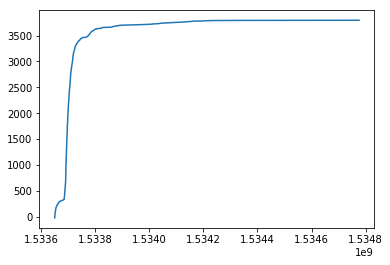

In [4]:
plt.plot(df.stamp, df.cmntcount);

In [5]:
from pyecharts import Bar, Line, Overlap
df['time_mdh'] = df.time.apply(lambda x:x.split(':')[0][5:])
df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200,yaxis_max=800)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000,yaxis_max=4000)

overlap = Overlap()
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

In [6]:
df[df.time_mdh.str.contains('08-09 14')]

,Unnamed: 0,No,page,nick,time,content,area,ip,length,against,agree,channel,hot,level,login_type,media_type,mid,stamp,cmntcount,time_mdh
201,201,202,11,驴驴驴胖咩咩_,2018-08-09 14:58:05,让你媳妇儿生个娃吧，免你死罪,吉林,111.26.33.237,24,1533797885,0,cj,0,1,0,0,5B6BE5FA-6F1A21ED-85D2BBA1-8C5-875,1533797885,3615,08-09 14
202,202,203,11,用户138****6863,2018-08-09 14:47:28,年轻人不是国家的未来和希望吗，,山东济南,144.123.92.134,15,1533797248,0,cj,0,0,2,0,5B6BE380-907B5C86-593A8E24855580BD-8C5-88A,1533797248,3614,08-09 14
203,203,204,11,不会笑的柴郡猫,2018-08-09 14:34:30,开心就好啊，摸摸,日本,126.196.61.172,23,1533796470,0,cj,0,1,0,0,5B6BE075-7EC43DAC-71F96BAA-8C5-91E,1533796470,3613,08-09 14
204,204,205,11,木木徽,2018-08-09 14:30:12,媒体还要点脸吗？怎么不看看根本原因呢？,安徽合肥,112.32.75.133,19,1533796212,1,cj,0,0,0,0,5B6BDF6F-70204B85-8F5CBBF5-8C5-8BD,1533796212,3612,08-09 14
205,205,206,11,翔鹤-瑞鹤-赤城-加贺-苍龙-飞龙,2018-08-09 14:29:04,叫你们工作是用来赚钱上缴国家的，你们竟然去买星巴克提高生活水平，是可忍孰不可忍,法国,77.136.198.8,39,1533796144,0,cj,0,0,0,0,5B6BDF2D-4D88C608-90D5C21C-8C5-8E0,1533796144,3611,08-09 14
206,206,207,11,巴吧嘟啦,2018-08-09 14:18:41,为经济危机背锅！系统性金融风险可不能怪消费，这是政策和贸易的问题,广东佛山,202.168.163.17,32,1533795520,3,cj,0,0,0,0,5B6BDCC0-CAA8A311-141F51565-8C5-83A,1533795521,3610,08-09 14
207,207,208,11,小生有礼_,2018-08-09 14:16:36,国家不是正想拉动内需吗?,广东东莞,14.24.39.23,12,1533795396,2,cj,0,0,0,0,5B6BDC43-E182717-698AD116-8C5-983,1533795396,3609,08-09 14
208,208,209,11,小灬熊熊,2018-08-09 14:15:42,的是命，哈哈,重庆,183.226.82.136,21,1533795342,5,cj,0,1,0,0,5B6BDC0B-B7E25288-183F043E5-8C5-88F,1533795342,3608,08-09 14
209,209,210,11,用户6394255872,2018-08-09 14:15:13,不婚主义，不生孩子，不买房（根本买不起），,上海,211.161.245.60,21,1533795313,3,cj,0,0,0,0,5B6BDBEE-D3A1F53C-17D209A00-8C5-983,1533795313,3607,08-09 14
210,210,211,11,YMM客源_g47,2018-08-09 14:15:02,哇塞，真不错,河南漯河,182.127.234.201,7,1533795302,0,cj,0,0,0,0,5B6BDBE2-B67FEAC9-1849D7235-8C5-89C,1533795302,3606,08-09 14


In [7]:



df.to_csv('Sina_Finance_Comments_2879316_20180821_Cleaned.csv', encoding='utf-8', line_terminator='\r\n')